In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras import layers
warnings.filterwarnings(action='ignore')

In [ ]:
df_human = pd.read_csv('human_results10.csv')
df_ai = pd.read_csv('ai_results10.csv')

In [ ]:
df_human['Label'] = 1
df_ai['Label'] = 0

In [ ]:
df_combined = pd.concat([df_human, df_ai], ignore_index=True)

In [ ]:
X = df_combined[['True Sentences', 'Generated Sentences', 'Precision', 'Recall', 'F1 Score', 'Edit Distance']]
y = df_combined['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test_sep = X_test
y_test_sep = y_test

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = X_train[[ 'Precision', 'Recall', 'F1 Score', 'Edit Distance']]
X_test = X_test[[ 'Precision', 'Recall', 'F1 Score', 'Edit Distance']]
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [ ]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.1944 - loss: 0.7445 - val_accuracy: 0.2222 - val_loss: 0.7346
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2046 - loss: 0.7267 - val_accuracy: 0.3264 - val_loss: 0.7173
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3303 - loss: 0.7132 - val_accuracy: 0.5556 - val_loss: 0.7003
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5449 - loss: 0.6980 - val_accuracy: 0.7153 - val_loss: 0.6838
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6996 - loss: 0.6827 - val_accuracy: 0.8542 - val_loss: 0.6681
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8732 - loss: 0.6691 - val_accuracy: 0.9028 - val_loss: 0.6532
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9313 - loss: 0.6550 - val_accuracy: 0.9028 - val_loss: 0.6390
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9070 - loss: 0.6419 - val_accuracy: 0.9028 - 

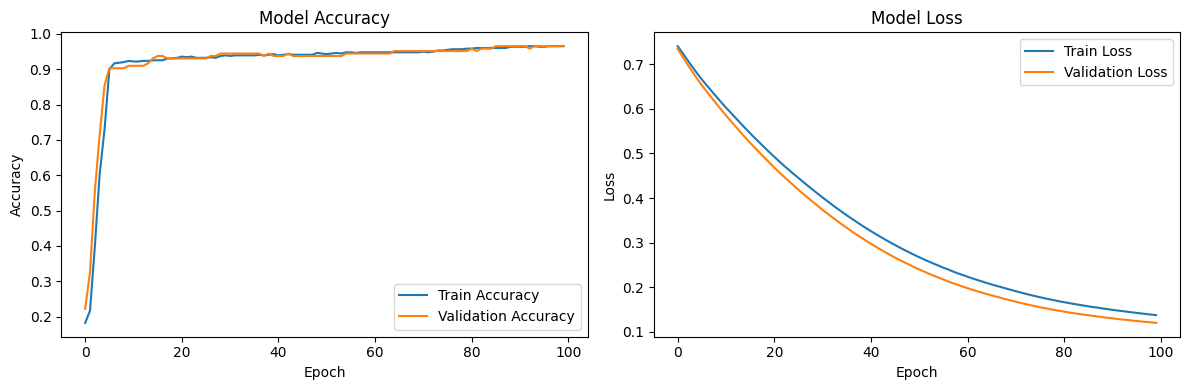

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9259 - loss: 0.1799 
Test Accuracy: 0.9277777671813965


In [ ]:
y_pred_1 = (model.predict(X_test) > 0.5).astype("int32")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       148
           1       0.77      0.84      0.81        32

    accuracy                           0.93       180
   macro avg       0.87      0.89      0.88       180
weighted avg       0.93      0.93      0.93       180



In [ ]:
paraphrase_df = pd.concat([X_test_sep[['True Sentences', 'Generated Sentences']], y_test_sep], axis=1)

In [ ]:
paraphrase_df.to_csv('sentences/paraphrase_df.csv', index=False)

In [ ]:
df_scores_test = pd.read_csv('df_scores_test.csv')

In [ ]:
X_test_fin = df_scores_test[['Precision', 'Recall', 'F1 Score', , 'Edit Distance']]
X_test_fin = st.fit_transform(X_test_fin)
y_test_fin = df_scores_test['Label']

In [ ]:
loss, accuracy = model.evaluate(X_test_fin, y_test_fin)
print("Test Accuracy:", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9094 - loss: 0.2156 
Test Accuracy: 0.9166666865348816


In [ ]:
y_pred_2 = (model.predict(X_test_fin) > 0.5).astype("int32")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fin, y_pred_2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       148
           1       0.76      0.78      0.77        32

    accuracy                           0.92       180
   macro avg       0.85      0.86      0.86       180
weighted avg       0.92      0.92      0.92       180



In [ ]:
y_pred_1 = [x[0] for x in y_pred_1]
y_pred_2 = [x[0] for x in y_pred_2]
df = pd.DataFrame({
    'Non-Paraphrased': y_pred_1,
    'Paraphrased': y_pred_2
})

df.to_csv('predictions.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from itertools import combinations
import keras
from keras import layers
from prettytable import PrettyTable

warnings.filterwarnings(action='ignore')

df_human = pd.read_csv('results/human_results10.csv')
df_ai = pd.read_csv('results/ai_results10.csv')

df_human['Label'] = 1
df_ai['Label'] = 0

df_combined = pd.concat([df_human, df_ai], ignore_index=True)
X = df_combined[['True Sentences', 'Generated Sentences', 'Precision', 'Recall', 'F1 Score', 'Edit Distance']]
y = df_combined['Label']

df_scores_test = pd.read_csv('df_scores_test.csv')
X_test_fin = df_scores_test[['Precision', 'Recall', 'F1 Score', 'Edit Distance']]
y_test_fin = df_scores_test['Label']

st = StandardScaler()

ablation_results = []

feature_sets = ['Precision', 'Recall', 'F1 Score', 'Edit Distance']

def train_evaluate_model(X_train, y_train, X_test, y_test):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return loss, accuracy

for i in range(1, len(feature_sets) + 1):
    for combo in combinations(feature_sets, i):
        X_train_subset = X[list(combo)]

        X_train_scaled = st.fit_transform(X_train_subset)
        X_test_scaled = st.transform(X_test_fin[list(combo)])

        loss, accuracy = train_evaluate_model(X_train_scaled, y, X_test_scaled, y_test_fin)

        ablation_results.append({
            'Features': ', '.join(combo),
            'Loss': loss,
            'Accuracy': accuracy
        })

ablation_results_df = pd.DataFrame(ablation_results)

table = PrettyTable()

table.field_names = ["Features", "Loss", "Accuracy"]

for index, row in ablation_results_df.iterrows():
    table.add_row([row["Features"], round(row["Loss"], 4), round(row["Accuracy"], 4)])

table.sortby = "Accuracy"
table.reversesort = True
print(table)


+--------------------------------------------+--------+----------+
|                  Features                  |  Loss  | Accuracy |
+--------------------------------------------+--------+----------+
| Precision, Recall, F1 Score, Edit Distance | 0.2605 |  0.9556  |
|      Precision, Recall, Edit Distance      | 0.263  |  0.9556  |
|      Recall, F1 Score, Edit Distance       | 0.2661 |  0.9389  |
|           Recall, Edit Distance            | 0.2613 |  0.9389  |
|                   Recall                   | 0.201  |  0.9222  |
|              Recall, F1 Score              | 0.1824 |  0.9167  |
|             Precision, Recall              | 0.1977 |  0.9111  |
|     Precision, F1 Score, Edit Distance     | 0.3811 |  0.9111  |
|        Precision, Recall, F1 Score         | 0.1909 |  0.9056  |
|            Precision, F1 Score             | 0.1843 |  0.9056  |
|          Precision, Edit Distance          | 0.5696 |  0.8889  |
|          F1 Score, Edit Distance           | 0.4714 |  0.888

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from itertools import combinations
import keras
from keras import layers
from prettytable import PrettyTable

warnings.filterwarnings(action='ignore')

df_human = pd.read_csv('results/human_results10.csv')
df_ai = pd.read_csv('results/ai_results10.csv')

df_human['Label'] = 1
df_ai['Label'] = 0

df_combined = pd.concat([df_human, df_ai], ignore_index=True)
X = df_combined[['True Sentences', 'Generated Sentences', 'Precision', 'Recall', 'F1 Score', 'Edit Distance']]
y = df_combined['Label']

df_scores_test = pd.read_csv('df_scores_test.csv')
X_test_fin = df_scores_test[['Precision', 'Recall', 'F1 Score', 'Edit Distance']]
y_test_fin = df_scores_test['Label']

st = StandardScaler()

ablation_results = []

feature_sets = ['Precision', 'Recall', 'F1 Score', 'Edit Distance']

def train_evaluate_model(X_train, y_train, X_test, y_test):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    macro_precision = precision_score(y_test, y_pred, average='macro')
    macro_recall = recall_score(y_test, y_pred, average='macro')
    macro_f1 = f1_score(y_test, y_pred, average='macro')

    return macro_precision, macro_recall, macro_f1

for i in range(1, len(feature_sets) + 1):
    for combo in combinations(feature_sets, i):
        X_train_subset = X[list(combo)]

        X_train_scaled = st.fit_transform(X_train_subset)
        X_test_scaled = st.transform(X_test_fin[list(combo)])

        macro_precision, macro_recall, macro_f1 = train_evaluate_model(X_train_scaled, y, X_test_scaled, y_test_fin)

        ablation_results.append({
            'Features': ', '.join(combo),
            'Macro Precision': macro_precision,
            'Macro Recall': macro_recall,
            'Macro F1 Score': macro_f1
        })

ablation_results_df = pd.DataFrame(ablation_results)

table = PrettyTable()

table.field_names = ["Features", "Macro Precision", "Macro Recall", "Macro F1 Score"]

for index, row in ablation_results_df.iterrows():
    table.add_row([row["Features"], round(row["Macro Precision"], 4), round(row["Macro Recall"], 4), round(row["Macro F1 Score"], 4)])

table.sortby = "Macro F1 Score"
table.reversesort = True

print(table)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
+--------------------------------------------+-----------------+--------------+----------------+
|                  Features                  | Macro Precision | Macro Recall | Macro F1 Score |
+--------------------------------------------+-----------------+--------------+----------------+
| Precision, Recall, F1 Score, Edit Distance |       0.9       |    0.973     |     0.9306     |
|      Precision, Recall, Edit Distance     

In [ ]:
macro_f1_results = ablation_results_df[['Features', 'Macro F1 Score']]

macro_f1_results = macro_f1_results.sort_values(by='Macro F1 Score', ascending=False)

macro_f1_table = PrettyTable()

macro_f1_table.field_names = ["Features", "Macro F1 Score"]

for index, row in macro_f1_results.iterrows():
    macro_f1_table.add_row([row["Features"], round(row["Macro F1 Score"], 4)])

print(macro_f1_table)

+--------------------------------------------+----------------+
|                  Features                  | Macro F1 Score |
+--------------------------------------------+----------------+
| Precision, Recall, F1 Score, Edit Distance |     0.9306     |
|      Precision, Recall, Edit Distance      |     0.9227     |
|           Recall, Edit Distance            |     0.9074     |
|      Recall, F1 Score, Edit Distance       |     0.8999     |
|                   Recall                   |     0.8731     |
|     Precision, F1 Score, Edit Distance     |     0.8714     |
|              Recall, F1 Score              |     0.8701     |
|          F1 Score, Edit Distance           |     0.8447     |
|          Precision, Edit Distance          |     0.8421     |
|             Precision, Recall              |     0.8356     |
|            Precision, F1 Score             |     0.8322     |
|        Precision, Recall, F1 Score         |     0.8322     |
|               Edit Distance           

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from itertools import combinations
import keras
from keras import layers

warnings.filterwarnings(action='ignore')

df_human = pd.read_csv('human_results10.csv')
df_ai = pd.read_csv('ai_results10.csv')

df_human['Label'] = 1
df_ai['Label'] = 0

df_combined = pd.concat([df_human, df_ai], ignore_index=True)
X = df_combined[['True Sentences', 'Generated Sentences', 'Precision', 'Recall', 'F1 Score', 'Edit Distance']]
y = df_combined['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

st = StandardScaler()

ablation_results = []

feature_sets = ['Precision', 'Recall', 'F1 Score', 'Edit Distance']

def train_evaluate_model(X_train, y_train, X_test, y_test):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    macro_f1 = f1_score(y_test, y_pred, average='macro')
    macro_precision = precision_score(y_test, y_pred, average='macro')
    macro_recall = recall_score(y_test, y_pred, average='macro')

    return macro_f1, macro_precision, macro_recall

for i in range(1, len(feature_sets) + 1):
    for combo in combinations(feature_sets, i):
        X_train_subset = X_train[list(combo)]
        X_test_subset = X_test[list(combo)]

        X_train_scaled = st.fit_transform(X_train_subset)
        X_test_scaled = st.transform(X_test_subset)

        macro_f1, macro_precision, macro_recall = train_evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test)

        ablation_results.append({
            'Features': ', '.join(combo),
            'Macro F1 Score': macro_f1,
            'Macro Precision': macro_precision,
            'Macro Recall': macro_recall
        })

ablation_results_df = pd.DataFrame(ablation_results)

print(ablation_results_df.sort_values(by='Macro F1 Score', ascending=False)[['Features', 'Macro F1 Score', 'Macro Precision', 'Macro Recall']])


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
                                      Features  Macro F1 Score  \
3                                Edit Distance        1.000000   
8                        Recall, Edit Distance        1.000000   
9                      F1 Score, Edit Distance        1.000000   
13             Recall, F1 Score, Edit Distance        1.000000   
6                     Precision, Edit Distance        0.990380   
11            Precision, Recall, Edit Distance        0.990380   
12          Precision, F1 Score, Edit Distance        0.990380   
14  Precision, R

In [ ]:
from tabulate import tabulate

ablation_results_df = pd.DataFrame(ablation_results)

sorted_results_df = ablation_results_df.sort_values(by='Macro F1 Score', ascending=False)

print(tabulate(sorted_results_df[['Features', 'Macro F1 Score', 'Macro Precision', 'Macro Recall']], headers='keys', tablefmt='pretty', floatfmt=".4f"))

+----+--------------------------------------------+---------------------+--------------------+--------------------+
|    |                  Features                  |   Macro F1 Score    |  Macro Precision   |    Macro Recall    |
+----+--------------------------------------------+---------------------+--------------------+--------------------+
| 3  |               Edit Distance                |         1.0         |        1.0         |        1.0         |
| 8  |           Recall, Edit Distance            |         1.0         |        1.0         |        1.0         |
| 9  |          F1 Score, Edit Distance           |         1.0         |        1.0         |        1.0         |
| 13 |      Recall, F1 Score, Edit Distance       |         1.0         |        1.0         |        1.0         |
| 6  |          Precision, Edit Distance          | 0.9903799903799904  | 0.9966442953020134 |      0.984375      |
| 11 |      Precision, Recall, Edit Distance      | 0.9903799903799904  